In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
df=pd.read_csv("xid-100438913_2.csv")
print("number of rows and columns:",df.shape)
df.head(5)

number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


Split the data into training and test sets

In [5]:
training_set=df.iloc[:1000,1:2].values
test_set=df.iloc[1000:,1:2].values

Build the input features with time lag of 1 day

In [6]:
#Feature Scaling
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

#Creating a data structure with 60 time-step and 1 output 
X_train= []
Y_train=[]
for i in range(60,1000):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
#(940,60,1)

  


(940, 60, 1)


Build the LSTM with 60 neurons and 4 hidden layers 

In [7]:
model =keras.models.Sequential()
#adding the first LSTM layer
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
#adding the second LSTM layer
model.add(LSTM(units = 60, return_sequences= True))
model.add(Dropout(0.5))
#adding the third LSTM layer
model.add(LSTM(units=60, return_sequences= True))
model.add(Dropout(0.5))
#adding the fourth LSTM layer
model.add(LSTM(units = 60))
model.add(Dropout(0.5))
#adding the output layer
model.add(Dense(units=1))
#compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
#fitting the RNN to the Training set
model.fit(X_train, Y_train,epochs=200, batch_size=16)

Epoch 1/200
59/59 [==============================] - 14s 58ms/step - loss: 0.0438
Epoch 2/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0209
Epoch 3/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0195
Epoch 4/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0190
Epoch 5/200
59/59 [==============================] - 3s 57ms/step - loss: 0.0161
Epoch 6/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0152
Epoch 7/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0145
Epoch 8/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0133
Epoch 9/200
59/59 [==============================] - 4s 61ms/step - loss: 0.0153
Epoch 10/200
59/59 [==============================] - 4s 63ms/step - loss: 0.0136
Epoch 11/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0125
Epoch 12/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0107
Epoch 13/200
59/59 [====

In [8]:
dataset_train=df.iloc[:1000,1:2]
dataset_test=df.iloc[1000:,1:2]
dataset_total=pd.concat((dataset_train,dataset_test),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
print(inputs.shape)
X_test=[]
for i in range(60, 319):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(319, 1)
(259, 60, 1)


Make Predictions using the test set

In [9]:
predicted_stock_price_1=model.predict(X_test)
predicted_stock_price_1=sc.inverse_transform(predicted_stock_price_1)

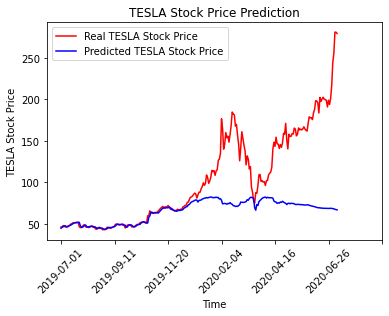

In [10]:
#Visualising the results
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_1, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

the second LSTM nodek is the one with 60 neurons and 6 hidden layers 

In [11]:
model1 =keras.models.Sequential()
#adding the first LSTM layer
model1.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
#adding the second LSTM layer
model1.add(LSTM(units = 60, return_sequences= True))
model1.add(Dropout(0.5))
#adding the third LSTM layer
model1.add(LSTM(units=60, return_sequences= True))
model1.add(Dropout(0.5))
#adding the fourth LSTM layer
model1.add(LSTM(units = 60,return_sequences=True))
model1.add(Dropout(0.5))
#adding the fifth LSTM layer
model1.add(LSTM(units=60,return_sequences=True))
model1.add(Dropout(0.5))
#adding the sixth LSTM layer
model1.add(LSTM(units=60))
model1.add(Dropout(0.5))
#adding the output layer
model1.add(Dense(units=1))
#compiling the RNN
model1.compile(optimizer='adam',loss='mean_squared_error')
#fitting the RNN to the Training set
model1.fit(X_train, Y_train,epochs=200, batch_size=32)

Epoch 1/200
30/30 [==============================] - 13s 95ms/step - loss: 0.0625
Epoch 2/200
30/30 [==============================] - 3s 94ms/step - loss: 0.0272
Epoch 3/200
30/30 [==============================] - 3s 93ms/step - loss: 0.0289
Epoch 4/200
30/30 [==============================] - 3s 93ms/step - loss: 0.0217
Epoch 5/200
30/30 [==============================] - 3s 94ms/step - loss: 0.0219
Epoch 6/200
30/30 [==============================] - 3s 93ms/step - loss: 0.0200
Epoch 7/200
30/30 [==============================] - 3s 93ms/step - loss: 0.0215
Epoch 8/200
30/30 [==============================] - 3s 94ms/step - loss: 0.0180
Epoch 9/200
30/30 [==============================] - 3s 94ms/step - loss: 0.0183
Epoch 10/200
30/30 [==============================] - 3s 93ms/step - loss: 0.0164
Epoch 11/200
30/30 [==============================] - 3s 92ms/step - loss: 0.0178
Epoch 12/200
30/30 [==============================] - 3s 92ms/step - loss: 0.0159
Epoch 13/200
30/30 [====

In [12]:
# Make predictions
predicted_stock_price_2 = model1.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

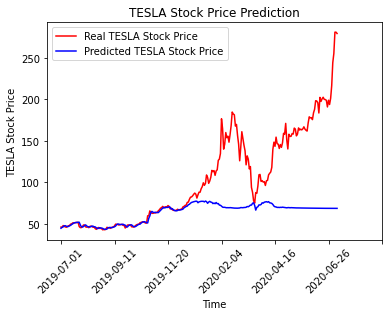

In [13]:
plt.plot(df.loc[1000:, 'Date'],dataset_test.values, color = 'red', label = "Real TESLA Stock Price")
plt.plot(df.loc[1000:, 'Date'],predicted_stock_price_2, color = 'blue', label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,328,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **when the dropout rate increase, the accuracy increase. but the network become less sensitive.**
# **when add the hidden layer, the avvuravy devrease. it will overfitting.**

predicted the future two week 

In [18]:
model2= Sequential()
#add LSTM layer
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.5))
#add the second LSTM layer
model2.add(LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.5))
#add the third LSTM layer
model2.add(LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.5))
#add the fourth LSTM layer
model2.add(LSTM(units=50))
model2.add(Dropout(0.5))
model2.add(Dense(units=10))
model2.compile(optimizer='adam',loss='mean_squared_error')
model2.fit(X_train,Y_train,epochs=100,batch_size=32)



Epoch 1/100
30/30 [==============================] - 8s 60ms/step - loss: 0.1314
Epoch 2/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0596
Epoch 3/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0445
Epoch 4/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0391
Epoch 5/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0350
Epoch 6/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0302
Epoch 7/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0277
Epoch 8/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0246
Epoch 9/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0241
Epoch 10/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0220
Epoch 11/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0198
Epoch 12/100
30/30 [==============================] - 2s 59ms/step - loss: 0.0199
Epoch 13/100
30/30 [=====

In [19]:
predicted_stock_price_3=model.predict(X_test)
predicted_stock_price_3=sc.inverse_transform(predicted_stock_price_3)
print(predicted_stock_price_3.shape)

(259, 10)


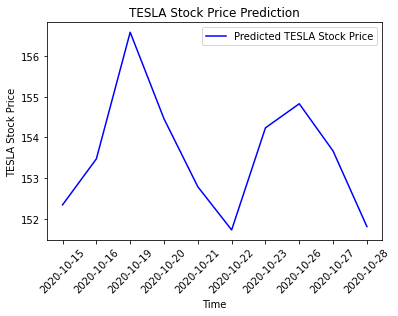

In [20]:
predicted_future_two_weeks = predicted_stock_price_3[-1, :]
myDates = ['2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28']
df.predicted = pd.DataFrame({"Date": myDates, "Predicted_Stock_Price": predicted_future_two_weeks})
# Visualising the results
plt.plot(df.predicted['Date'], predicted_future_two_weeks, color = 'blue', label = "Predicted TESLA Stock Price")
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.xticks(myDates, rotation=45)
plt.legend()
plt.show()